# 빚을 갚을 거야 말거야


In [2]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")


In [ ]:
# file_paths = [
#     f"G:/내 드라이브/side_projects_datasets/rawdata/Bank_Credit_Default/data/train_data/train_data_{i}.pq"
#     for i in range(12)
# ]  # 파일 경로 리스트 생성

# dfs = []  # 데이터프레임을 저장할 리스트

# for file_path in file_paths:
#     df = pd.read_parquet(file_path)  # Parquet 파일 열기
#     dfs.append(df)  # 데이터프레임을 리스트에 추가

# credits = pd.concat(dfs, ignore_index=True)  # 데이터프레임 결합

# # 결합된 데이터프레임 확인
# print(credits.shape)


(26162717, 61)


In [ ]:
# # 데이터 프레임 csv 저장
# credits.to_csv(
#     r"G:/내 드라이브/side_projects_datasets/rawdata/Bank_Credit_Default/data/train_data/train_data.csv",
#     index=False,
# )


| Feature                       | Description                                               |
| ----------------------------- | --------------------------------------------------------- |
| id                            | 신용 신청의 식별자                                        |
| rn                            | 신용 이력 내 신용 상품의 순번                             |
| pre_since_opened              | 신용 개설일로부터 데이터 수집일의 일 수                   |
| pre_since_confirmed           | 신용 정보 확인일로부터 데이터 수집일의 일 수              |
| pre_pterm                     | 신용 개설일로부터 대출 종료일의 계획된 일 수              |
| pre_fterm                     | 신용 개설일로부터 대출 종료일의 실제 일 수                |
| pre_till_pclose               | 데이터 수집일로부터 대출 종료일의 계획된 일 수            |
| pre_till_fclose               | 데이터 수집일로부터 대출 종료일의 실제 일 수              |
| pre_loans_credit_limit        | 신용 한도                                                 |
| pre_loans_next_pay_summ       | 다음 대출 상환액                                          |
| pre_loans_outstanding         | 미결제 대출액                                             |
| pre_loans_total_overdue       | 현재 미결제 대출액                                        |
| pre_loans_max_overdue_sum     | 최대 미결제 대출액                                        |
| pre_loans_credit_cost_rate    | 총 대출 비용                                              |
| pre_loans5                    | 5일 미만의 연체 건수                                      |
| pre_loans530                  | 5~30일 미만의 연체 건수                                   |
| pre_loans3060                 | 30~60일 미만의 연체 건수                                  |
| pre_loans6090                 | 60~90일 미만의 연체 건수                                  |
| pre_loans90                   | 90일 이상 연체 건수                                       |
| is_zero_loans_5               | 5일 미만의 연체 건수가 없는 경우의 플래그                 |
| is_zero_loans_530             | 5~30일 미만의 연체 건수가 없는 경우의 플래그              |
| is_zero_loans_3060            | 30~60일 미만의 연체 건수가 없는 경우의 플래그             |
| is_zero_loans_6090            | 60~90일 미만의 연체 건수가 없는 경우의 플래그             |
| is_zero_loans90               | 90일 이상 연체 건수가 없는 경우의 플래그                  |
| pre_util                      | 미결제 대출액과 신용 한도의 비율                          |
| pre_over2limit                | 현재 미결제 대출액과 신용 한도의 비율                     |
| pre_maxover2limit             | 최대 미결제 대출액과 신용 한도의 비율                     |
| is_zero_util                  | 미결제 대출액과 신용 한도의 비율이 0인 경우의 플래그      |
| is_zero_over2limit            | 현재 미결제 대출액과 신용 한도의 비율이 0인 경우의 플래그 |
| is_zero_maxover2limit         | 최대 미결제 대출액과 신용 한도의 비율이 0인 경우의 플래그 |
| enc*paym*{0…n}                | 지난 n개월의 월별 상환 상태                               |
| enc_loans_account_holder_type | 대출과의 관계 유형                                        |
| enc_loans_credit_status       | 신용 상태                                                 |
| enc_loans_account_cur         | 대출 통화                                                 |
| enc_loans_credit_type         | 대출 유형                                                 |
| pclose_flag                   | 계획된 대출 종료일의 플래그                               |
| fclose_flag                   | 실제 대출 종료일의 플래그                                 |


## EDA


In [4]:
credits = pd.read_csv(r'G:/내 드라이브/side_projects_datasets/rawdata/Bank_Credit_Default/data/train_data/train_data.csv')

credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26162717 entries, 0 to 26162716
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19

In [5]:
cs = credits["enc_loans_credit_status"].value_counts().sort_index()  # 신용등급은 6단계까지 있음
cs

0        1981
1       48568
2     8276203
3    17561773
4      201958
5       68431
6        3803
Name: enc_loans_credit_status, dtype: int64

In [8]:
# 각 변수 이름에 대해 1부터 6까지의 값을 저장
for i in range(1, 7):
    var_name = f'cs{i}'  # 변수 이름 생성
    var_value = cs[cs.index == i]  # 해당 값에 해당하는 인덱스를 추출하여 변수 값으로 저장
    locals()[var_name] = var_value  # 생성된 변수를 로컬 네임스페이스에 저장

Text(0.5, 1.0, '신용등급 분포')

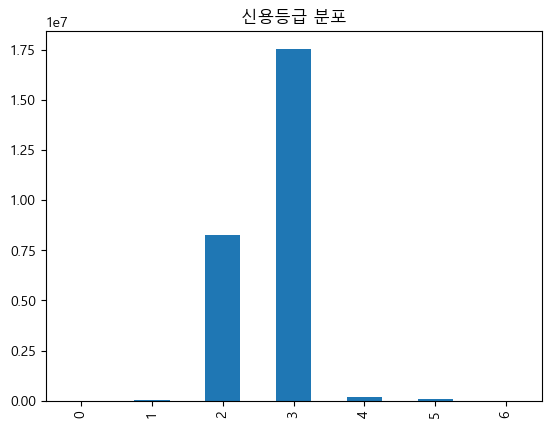

In [6]:
cs.plot.bar()

plt.title("신용등급 분포")

In [7]:
credits_type = credits["enc_loans_credit_type"].value_counts().sort_index()
credits_type

0      756480
1      880196
2      617386
3     7736233
4    14774986
5     1050346
6       36873
7      310217
Name: enc_loans_credit_type, dtype: int64

In [18]:
cs_el = credits.groupby("enc_loans_credit_status")["pre_loans_credit_cost_rate"].mean()
cs_el = pd.DataFrame(cs_el)

cs_el

,pre_loans_credit_cost_rate
enc_loans_credit_status,
0,3.553761
1,4.047706
2,4.964128
3,4.468965
4,3.632221
5,4.529117
6,3.851696


KeyError: 0